In [1]:
import squidpy as sq
from ngff_tables_prototype.writer import write_spatial_anndata
import numpy as np
import matplotlib.pyplot as plt
from anndata import AnnData

%load_ext autoreload
%autoreload 2
# %load_ext lab_black

In [2]:
adata = sq.datasets.visium_fluo_adata_crop()
img = sq.datasets.visium_fluo_image_crop()

lib_id = "V1_Adult_Mouse_Brain_Coronal_Section_2"
spatial_key = "spatial"

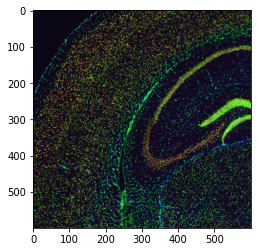

In [3]:
plt.imshow(adata.uns[spatial_key][lib_id]["images"]["hires"])

In [4]:
image = adata.uns[spatial_key][lib_id]["images"]["hires"]
scalef = adata.uns[spatial_key][lib_id]["scalefactors"]["tissue_hires_scalef"]
adata.obsm[spatial_key] = adata.obsm[spatial_key] * scalef

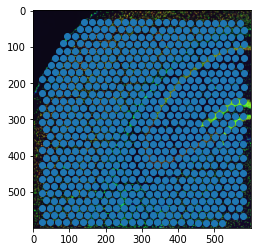

In [5]:
fig, ax = plt.subplots(1, 1)
ax.imshow(image)
coords = adata.obsm[spatial_key]
ax.scatter(coords[:, 0], coords[:, 1])

In [6]:
adata.X = adata.X.A.copy()

In [7]:
tables_adata = adata.copy()
circles_adata = AnnData(None, obs = adata.obs.copy(),var=adata.var.copy(), obsm={"spatial":adata.obsm["spatial"]}, uns=adata.uns.copy())
circles_adata.obs_names = adata.obs_names.copy()
circles_adata.var_names = adata.var_names.copy()

In [8]:
write_spatial_anndata(
    file_path="test_visium.zarr",
    image_axes=["c", "y", "x"],
    image=np.swapaxes(adata.uns[spatial_key][lib_id]["images"]["hires"], 2, 0),
    tables_adata=tables_adata,
    circles_adata=circles_adata,
)

/Users/giovanni.palla/miniconda3/envs/squidpy/lib/python3.8/site-packages/zarr/creation.py:226: UserWarning: ignoring keyword argument 'maxshape'
  warn('ignoring keyword argument %r' % k)
